In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib as mpl
sb.set() # set the default Seaborn style for graphics

from numpy.random import RandomState
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import datetime as dt
%matplotlib inline
import nltk
from nltk.probability import FreqDist


from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR


In [2]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,4/1/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,4/1/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,4/1/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,4/1/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,4/1/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# split data into training(80%) and test (20%) 

In [3]:
R = RandomState(seed=1)
train = listings.sample(frac=0.8, random_state=R)
test = listings.loc[~listings.index.isin(train.index)]

In [4]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [5]:
train.shape

(3054, 92)

In [6]:
train.head(2)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3994601,https://www.airbnb.com/rooms/3994601,2.020000e+13,4/1/2016,Crayola Home Green Room-Bunk Bed 5,Our space is a mix of a hostel and a home. We ...,Our listing offers a unique Airbnb experience ...,Our space is a mix of a hostel and a home. We ...,none,The Capitol Hill neighborhood has a great mix ...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,18,1.24
1,723846,https://www.airbnb.com/rooms/723846,2.020000e+13,4/1/2016,Seattle Cozy Cottage in Maple Leaf,Beautiful little cottage built in 2012 featuri...,We have a beautiful new little cozy studio gue...,Beautiful little cottage built in 2012 featuri...,none,People who live in the Maple Leaf neighborhood...,...,10.0,f,NaN,WASHINGTON,f,strict,f,t,1,1.21


In [7]:
test.shape

(764, 92)

In [8]:
test.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,5680462,https://www.airbnb.com/rooms/5680462,2.020000e+13,4/1/2016,Stunning 6 bd in THE BEST Location!,"Stunning Designsponge featured 6 bed, 3.75 bat...","Gorgeous, LIGHT FILLED, Newly Constructed Mode...","Stunning Designsponge featured 6 bed, 3.75 bat...",none,Queen Anne is THE BEST and most desirable neig...,...,10.0,f,NaN,WASHINGTON,t,strict,f,f,1,2.65
1,8988178,https://www.airbnb.com/rooms/8988178,2.020000e+13,4/1/2016,"Lovely Queen Anne Cottage, 2 BR","This home is full of light, art and comfort. 5...","The Space This is a 1000 square foot, two bedr...","This home is full of light, art and comfort. 5...",none,Queen Anne is a charming and very safe neighbo...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.73


# Dropping columns we think are irrelevant

In [9]:
keep_features = [
        'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'host_id',
        'host_since',
        'host_is_superhost', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'latitude',
        'longitude', 'is_location_exact', 'property_type', 'room_type',
        'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'amenities', 'security_deposit', 'cleaning_fee',
        'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
        'minimum_minimum_nights', 'maximum_minimum_nights',
        'minimum_maximum_nights', 'maximum_maximum_nights',
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
        'has_availability', 'availability_30', 'availability_60',
        'availability_90', 'availability_365', 'calendar_last_scraped',
        'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
        'require_guest_profile_picture', 'require_guest_phone_verification',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'number_of_reviews','price'
    ]


drop_features = [i for i in listings.columns if i not in keep_features]

t1 = train.copy()
t1.drop(drop_features, axis=1, inplace=True)
train=t1.copy()

t2 = test.copy()
t2.drop(drop_features, axis=1, inplace=True)
test = t2.copy()


t3 = listings.copy()
t3.drop(drop_features, axis=1, inplace=True)
listings = t3.copy()

In [10]:
listings.shape

(3818, 44)

In [11]:
train.shape

(3054, 44)

In [12]:
test.shape

(764, 44)

# Dropping listings that are more than one year old

In [13]:
def discard_old_listings(df,drop_listings):
        
    more_than_12months=sorted(df[df['calendar_updated'].str.contains(
    'months ago')]['calendar_updated'].unique())
    
    more_than_12months=[i for i in more_than_12months if int(i[:-10])>12]
    
    if(drop_listings==False):  #Give the reader an idea of listings to be dropped
        #print('All listing periods=',df['calendar_updated'].unique(),'\n')
        print('Listing periods of at least a year old=',more_than_12months)
    
    if drop_listings==True:
        
        for i in more_than_12months:
            
            j=df[df['calendar_updated'].str.contains(i)].index
            
            df.drop(df.index[j],inplace=True)
            df.reset_index(drop=True,inplace=True)
        
        df.drop('calendar_updated', axis=1, inplace=True)
        
    return df

In [14]:
listings = discard_old_listings(listings,False)
listings.shape

Listing periods of at least a year old= ['13 months ago', '14 months ago', '15 months ago', '16 months ago', '17 months ago', '22 months ago', '30 months ago']


(3818, 44)

In [15]:
listings = discard_old_listings(listings,True)
listings.shape

(3809, 43)

In [16]:
listings.head()

,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,956883,11/8/2011,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,...,41,71,346,4/1/2016,207,f,moderate,f,f,2
1,5177328,21/2/2013,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,Queen Anne,...,13,16,291,4/1/2016,43,f,strict,t,t,6
2,16708587,12/6/2014,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,West Queen Anne,Queen Anne,...,6,17,220,4/1/2016,20,f,strict,f,f,2
3,9851441,6/11/2013,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,West Queen Anne,Queen Anne,...,0,0,143,4/1/2016,0,f,flexible,f,f,1
4,1452570,29/11/2011,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,...,60,90,365,4/1/2016,38,f,strict,f,f,1


In [17]:
train=discard_old_listings(train,True)
train.shape

(3047, 43)

In [18]:
test=discard_old_listings(test,True)
test.shape

(762, 43)

# Data cleaning (removal of dollar signs, comma etc)

In [19]:
def clean_data(df):
    
    for i in ['price','cleaning_fee','security_deposit', 'extra_people']:
        df[i]=df[i].str.replace('$','').str.replace(',', '').astype(float)
    
    df['amenities']=df['amenities'].str.replace('{}','').str.replace('{ }','')
    
    df['amenities']=df['amenities'].str.replace(
    '$','').str.replace('{','').str.replace('}','').str.replace(
    '"','').str.replace(' toilet','toilet').str.replace('Cable TV','TV')

    df.replace('', np.nan, inplace=True)
    
    return df

In [20]:
listings=clean_data(listings)
train=clean_data(train)
test=clean_data(test)

In [21]:
listings.shape, train.shape, test.shape

((3809, 43), (3047, 43), (762, 43))

In [22]:
listings[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"TV,TV,Internet,Wireless Internet,Air Condition...",85.0,NaN,NaN,5.0
1,"TV,Internet,Wireless Internet,Kitchen,Free Par...",150.0,40.0,100.0,0.0
2,"TV,TV,Internet,Wireless Internet,Air Condition...",975.0,300.0,1000.0,25.0
3,"Internet,Wireless Internet,Kitchen,Indoor Fire...",100.0,NaN,NaN,0.0
4,"TV,TV,Internet,Wireless Internet,Kitchen,Heati...",450.0,125.0,700.0,15.0
...,...,...,...,...,...
3804,"TV,TV,Internet,Wireless Internet,Air Condition...",359.0,230.0,NaN,0.0
3805,"TV,TV,Internet,Wireless Internet,Kitchen,Free ...",79.0,50.0,500.0,25.0
3806,"TV,Wireless Internet,Kitchen,Free Parking on P...",93.0,35.0,250.0,20.0
3807,"TV,Wireless Internet,Kitchen,Free Parking on P...",99.0,45.0,300.0,0.0


In [23]:
train[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"Wireless Internet,Kitchen,Free Parking on Prem...",27.0,NaN,NaN,0.0
1,"TV,Internet,Wireless Internet,Kitchen,Free Par...",79.0,65.0,300.0,5.0
2,"TV,TV,Internet,Wireless Internet,Air Condition...",63.0,50.0,100.0,0.0
3,"Wireless Internet,Free Parking on Premises,Hea...",99.0,15.0,100.0,0.0
4,"TV,Wireless Internet,Buzzer/Wireless Intercom,...",87.0,10.0,100.0,20.0
...,...,...,...,...,...
3042,"TV,Internet,Wireless Internet,Kitchen,Free Par...",85.0,50.0,NaN,20.0
3043,"TV,TV,Internet,Wireless Internet,Pool,Kitchen,...",250.0,120.0,250.0,25.0
3044,"TV,Wireless Internet,Kitchen,Free Parking on P...",75.0,40.0,NaN,0.0
3045,"TV,Internet,Wireless Internet,Kitchen,Free Par...",119.0,NaN,NaN,0.0


In [24]:
test[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"TV,TV,Internet,Wireless Internet,Kitchen,Free ...",461.0,300.0,1500.0,50.0
1,"TV,TV,Internet,Kitchen,Free Parking on Premise...",109.0,89.0,NaN,0.0
2,"TV,TV,Internet,Wireless Internet,Kitchen,Free ...",200.0,NaN,NaN,0.0
3,"Internet,Wireless Internet,Kitchen,Free Parkin...",110.0,NaN,NaN,0.0
4,"TV,TV,Wireless Internet,Air Conditioning,Wheel...",450.0,200.0,500.0,50.0
...,...,...,...,...,...
757,"TV,Internet,Wireless Internet,Kitchen,Heating,...",115.0,60.0,199.0,12.0
758,"TV,TV,Internet,Wireless Internet,Free Parking ...",85.0,40.0,100.0,0.0
759,"TV,TV,Internet,Wireless Internet,Air Condition...",109.0,55.0,200.0,30.0
760,"TV,Internet,Wireless Internet,Kitchen,Free Par...",77.0,15.0,NaN,15.0


# Check the amount of missing data in columns

In [25]:
def quick_check_missing_data(df,data):
    print('features with missing data in {}'.format(data))
    print('________________________________________________')
    
    for i in df.columns.values:
        x=df.loc[df[i].isnull()][i]
        if len(x)>0:print(i,len(x))
    print('________________________________________________')
    print()

In [26]:
quick_check_missing_data(listings,'training data set')

features with missing data in training data set
________________________________________________
host_since 2
host_is_superhost 2
host_listings_count 2
host_total_listings_count 2
host_has_profile_pic 2
host_identity_verified 2
zipcode 7
property_type 1
bathrooms 16
bedrooms 6
beds 1
amenities 45
security_deposit 1947
cleaning_fee 1026
________________________________________________



In [27]:
quick_check_missing_data(train,'training data set')

features with missing data in training data set
________________________________________________
host_since 2
host_is_superhost 2
host_listings_count 2
host_total_listings_count 2
host_has_profile_pic 2
host_identity_verified 2
zipcode 6
property_type 1
bathrooms 13
bedrooms 4
beds 1
amenities 34
security_deposit 1558
cleaning_fee 825
________________________________________________



In [28]:
quick_check_missing_data(test, 'test data set')

features with missing data in test data set
________________________________________________
zipcode 1
bathrooms 3
bedrooms 2
amenities 11
security_deposit 389
cleaning_fee 201
________________________________________________



# Listing out the number of categorical and numerical columns

In [29]:
def feature_identification(df):
    categorical_features = df.columns[df.dtypes == 'object']
    numerical_features = df.columns[df.dtypes != 'object']
    
    i=len(categorical_features)
    j=len(numerical_features)
    
    print('There are {} categorical features and {} numerical features'.format(i,j),'\n')
    print('categorical features={}'.format(sorted(categorical_features)),'\n')
    print('numerical features={}'.format(sorted(numerical_features)),'\n')
    
    return (categorical_features,numerical_features)

categorical_features,numerical_features=feature_identification(train)

There are 21 categorical features and 22 numerical features 

categorical features=['amenities', 'bed_type', 'calendar_last_scraped', 'cancellation_policy', 'city', 'has_availability', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_since', 'host_verifications', 'instant_bookable', 'is_location_exact', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'require_guest_phone_verification', 'require_guest_profile_picture', 'room_type', 'state', 'zipcode'] 

numerical features=['accommodates', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 'cleaning_fee', 'extra_people', 'guests_included', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit'] 



# Checking missing data in columns

In [30]:
def check_var(i,numerical_features):
    if i in numerical_features: 
        return('numerical')
    else:
        return('categorical')
    
def check_missing_data(df,numerical_features):
    df2 = df.isnull().sum()
    df2.sort_values(axis=0,ascending=False,inplace=True)
    number_of_rows=len(df)
    missing_types=[check_var(i,numerical_features) for i in df2.index]
    headers=[tuple(df[i].head(n=5)) for i in df2.index]
    tmp1 = pd.DataFrame({'Feature':df2.index, 
                         'Missing values':df2.values})
    tmp1['Feature type']=pd.Series(missing_types, index=tmp1.index)
    tmp1['Percentage missing']=pd.Series(df2.values*100/number_of_rows, index=tmp1.index)
    tmp1['First 5 values']=pd.Series(headers, index=tmp1.index)
    return tmp1

In [31]:
tmp=check_missing_data(listings,numerical_features)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,1947,numerical,51.115778,"(nan, 100.0, 1000.0, nan, 700.0)"
1,cleaning_fee,1026,numerical,26.936204,"(nan, 40.0, 300.0, nan, 125.0)"
2,amenities,45,categorical,1.181412,"(TV,TV,Internet,Wireless Internet,Air Conditio..."
3,bathrooms,16,numerical,0.420058,"(1.0, 1.0, 4.5, 1.0, 2.0)"
4,zipcode,7,categorical,0.183775,"(98119, 98119, 98119, 98119, 98119)"
5,bedrooms,6,numerical,0.157522,"(1.0, 1.0, 5.0, 0.0, 3.0)"
6,host_since,2,categorical,0.052507,"(11/8/2011, 21/2/2013, 12/6/2014, 6/11/2013, 2..."
7,host_is_superhost,2,categorical,0.052507,"(f, t, f, f, f)"
8,host_listings_count,2,numerical,0.052507,"(3.0, 6.0, 2.0, 1.0, 2.0)"
9,host_total_listings_count,2,numerical,0.052507,"(3.0, 6.0, 2.0, 1.0, 2.0)"


In [32]:
tmp=check_missing_data(train,numerical_features)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,1558,numerical,51.132261,"(nan, 300.0, 100.0, 100.0, 100.0)"
1,cleaning_fee,825,numerical,27.075812,"(nan, 65.0, 50.0, 15.0, 10.0)"
2,amenities,34,categorical,1.115852,"(Wireless Internet,Kitchen,Free Parking on Pre..."
3,bathrooms,13,numerical,0.426649,"(3.5, 1.0, 1.0, 1.0, 1.0)"
4,zipcode,6,categorical,0.196915,"(98112, 98115, 98117, 98119, 98104)"
5,bedrooms,4,numerical,0.131277,"(1.0, 0.0, 1.0, 1.0, 1.0)"
6,host_since,2,categorical,0.065638,"(8/7/2013, 2/10/2012, 20/8/2014, 31/12/2014, 1..."
7,host_is_superhost,2,categorical,0.065638,"(f, f, t, t, f)"
8,host_listings_count,2,numerical,0.065638,"(18.0, 1.0, 3.0, 1.0, 1.0)"
9,host_total_listings_count,2,numerical,0.065638,"(18.0, 1.0, 3.0, 1.0, 1.0)"


In [33]:
tmp=check_missing_data(test,numerical_features)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,389,numerical,51.049869,"(1500.0, nan, nan, nan, 500.0)"
1,cleaning_fee,201,numerical,26.377953,"(300.0, 89.0, nan, nan, 200.0)"
2,amenities,11,categorical,1.443570,"(TV,TV,Internet,Wireless Internet,Kitchen,Free..."
3,bathrooms,3,numerical,0.393701,"(3.5, 1.0, 2.0, 1.0, 2.5)"
4,bedrooms,2,numerical,0.262467,"(6.0, 2.0, 1.0, 1.0, 3.0)"
5,zipcode,1,categorical,0.131234,"(98119, 98119, 98119, 98119, 98119)"


# Replacing missing data respectively

In [34]:
def drop_features_and_impute_values(df):
    df['security_deposit'].fillna(0.0,inplace=True)
    df['cleaning_fee'].fillna(0.0,inplace=True)
    df.dropna(subset=['zipcode','amenities',
                      'cancellation_policy',
                      'host_verifications'],inplace=True)
    df.drop('city', axis=1, inplace=True) 
    df.drop('host_since',axis=1,inplace=True)
    
    ftodrop=['beds','bathrooms','bedrooms',
              'host_is_superhost','host_listings_count',
              'host_total_listings_count','host_has_profile_pic',
              'host_identity_verified','state', 'property_type']
    
    for i in ftodrop:
        df[i].fillna(df[i].mode()[0], inplace=True)
        
    df.reset_index(drop=True,inplace=True)

In [35]:
drop_features_and_impute_values(listings)

In [36]:
drop_features_and_impute_values(train)

In [37]:
drop_features_and_impute_values(test)

In [38]:
def check_cleaningness(df):
    print(df.shape)
    print(df.isnull().values.any())

In [39]:
check_cleaningness(listings)
check_missing_data(listings,numerical_features).head()

(3757, 41)
False


,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,calculated_host_listings_count,0,numerical,0.0,"(2, 6, 2, 1, 1)"
1,beds,0,numerical,0.0,"(1.0, 1.0, 7.0, 2.0, 3.0)"
2,bathrooms,0,numerical,0.0,"(1.0, 1.0, 4.5, 1.0, 2.0)"
3,accommodates,0,numerical,0.0,"(4, 4, 11, 3, 6)"
4,room_type,0,categorical,0.0,"(Entire home/apt, Entire home/apt, Entire home..."


In [40]:
check_cleaningness(train)
check_missing_data(train,numerical_features).head()

(3007, 41)
False


,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,calculated_host_listings_count,0,numerical,0.0,"(18, 1, 3, 1, 1)"
1,beds,0,numerical,0.0,"(1.0, 1.0, 1.0, 1.0, 1.0)"
2,bathrooms,0,numerical,0.0,"(3.5, 1.0, 1.0, 1.0, 1.0)"
3,accommodates,0,numerical,0.0,"(1, 3, 2, 2, 2)"
4,room_type,0,categorical,0.0,"(Shared room, Entire home/apt, Private room, P..."


In [41]:
check_cleaningness(test)
check_missing_data(test,numerical_features).head()

(750, 41)
False


,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,calculated_host_listings_count,0,numerical,0.0,"(1, 1, 1, 1, 2)"
1,beds,0,numerical,0.0,"(15.0, 2.0, 1.0, 1.0, 5.0)"
2,bathrooms,0,numerical,0.0,"(3.5, 1.0, 2.0, 1.0, 2.5)"
3,accommodates,0,numerical,0.0,"(16, 5, 2, 1, 8)"
4,room_type,0,categorical,0.0,"(Entire home/apt, Entire home/apt, Private roo..."


In [42]:
# Histogram plot of response variable(price)
# Examine distribution of price via histogram as well as the distribution of the log transformed prices
# Take Log transformed price for machine learning modelling because it follows a normal distribution better

In [43]:
def plot_price(df):
    plt.rcParams['figure.figsize']=(20,4)
    plt.style.use(style='ggplot')
    xxx,sub=plt.subplots(1,2)
    
    sub[0].hist(df.price, color='blue')
    sub[0].set_title('price; skewness=%.5f'%(df.price.skew()),fontsize=20)
    sub[0].set_xlabel('Price',fontsize=20)
    sub[0].tick_params(labelsize=16)
    
    sub[1].hist(np.log1p(df.price), color='blue')
    sub[1].set_title('Log transfromed price; skewness=%.5f'%(np.log1p(df.price).skew()),fontsize=20)
    sub[1].set_xlabel('log(Price)',fontsize=20)
    sub[1].tick_params(labelsize=16)
    
    plt.show()

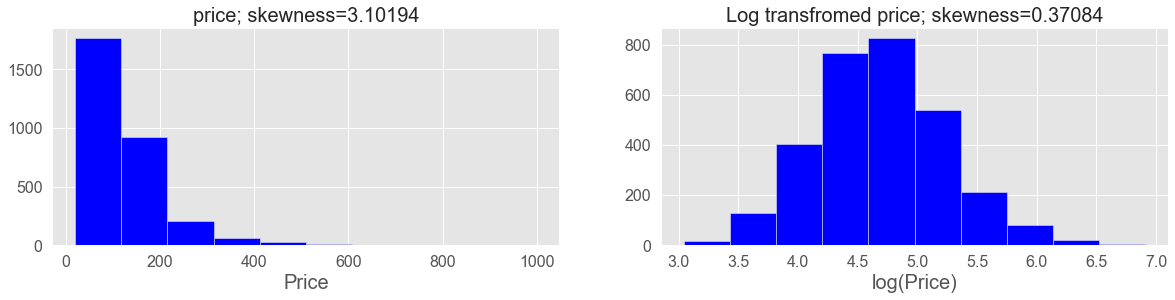

In [44]:
plot_price(train)

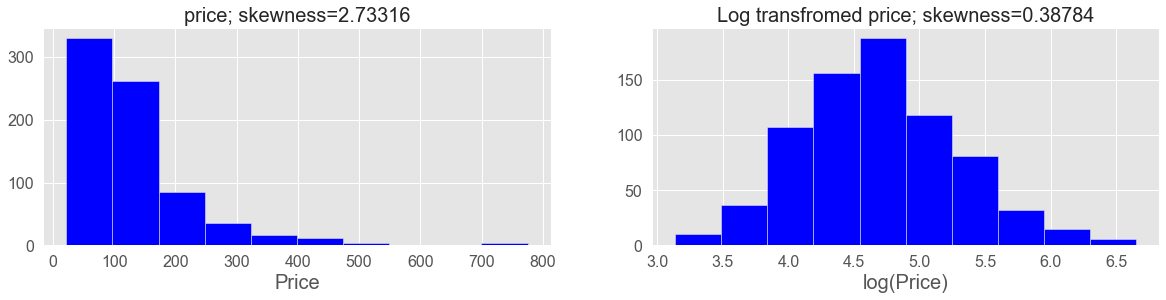

In [45]:
plot_price(test)

In [46]:
train['price'].describe()

count    3007.000000
mean      126.844031
std        87.100660
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max       999.000000
Name: price, dtype: float64

# Data visualization 

In [44]:
def plot_property(df,title):
    all_properties=df['property_type'].tolist()
    fdist = FreqDist(all_properties)
    prop = pd.DataFrame({'Property': list(fdist.keys()),'Count': list(fdist.values())})
    prop = prop.nlargest(columns="Count", n = 10)
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    prop.plot(x='Property',y='Count',kind='bar',color='red')
    plt.ylabel('Frequency',fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=12)
    plt.tick_params(labelsize=20)
    plt.xticks(rotation='vertical')
    plt.legend(fontsize=22)
    plt.show()

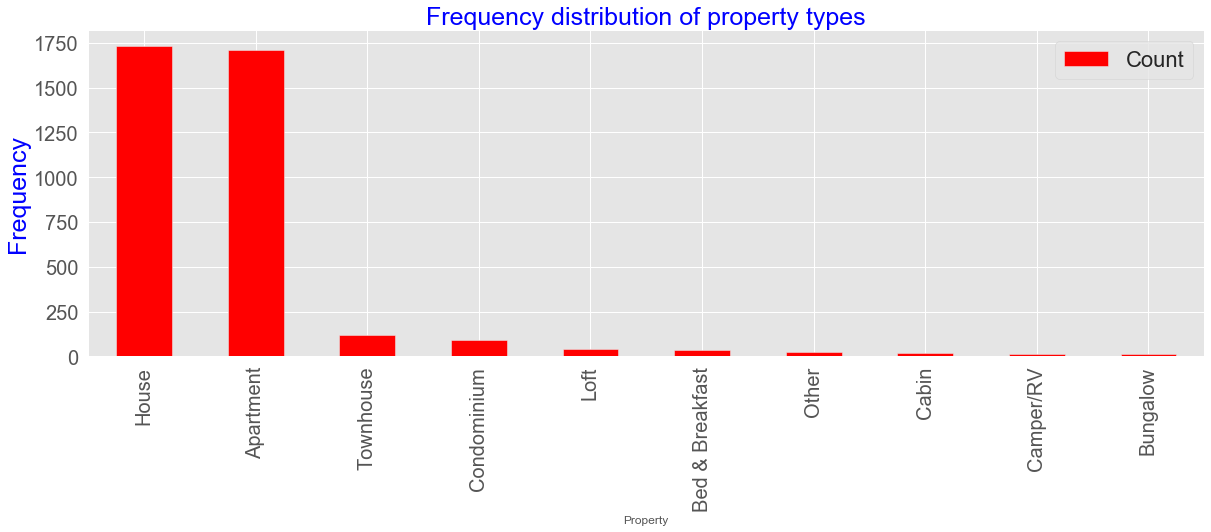

In [45]:
df = data
title='Frequency distribution of property types'
plot_property(df,title)

In [46]:
def plot_average_price(feature,label,df,nlength,title,color1,color2):
    
    sort_price = df.groupby(feature)['price'].mean().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'average price'}, inplace=True)
    
    d = sort_price.copy()
    d = d.nlargest(columns="average price", n =min(len(d),nlength))
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    #plt.bar(d['neighbourhood'],d['average price'])
    d.plot(x=label, y='average price', kind="bar",color=color1)
    #plt.xlabel(label,fontsize=25,color=color2)
    plt.ylabel('Average price',fontsize=25,color=color2)
    plt.title(title,fontsize=25,color=color2)
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=20)
    plt.xticks(rotation='vertical')
    plt.show()

def plot_median_price(feature,label,df,nlength,title,color1,color2):
    
    sort_price = df.groupby(feature)['price'].median().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'median price'}, inplace=True)
    
    d = sort_price.copy()
    d = d.nlargest(columns="median price", n =min(len(d),nlength))
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    #plt.bar(d['neighbourhood'],d['average price'])
    d.plot(x=label, y='median price', kind="bar",color=color1)
    #plt.xlabel(label,fontsize=25)
    plt.ylabel('Median price',fontsize=25,color=color2)
    plt.title(title,fontsize=25,color=color2)
    #plt.xlabel('Amenity',fontsize=12)
    plt.legend(fontsize=20)
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()

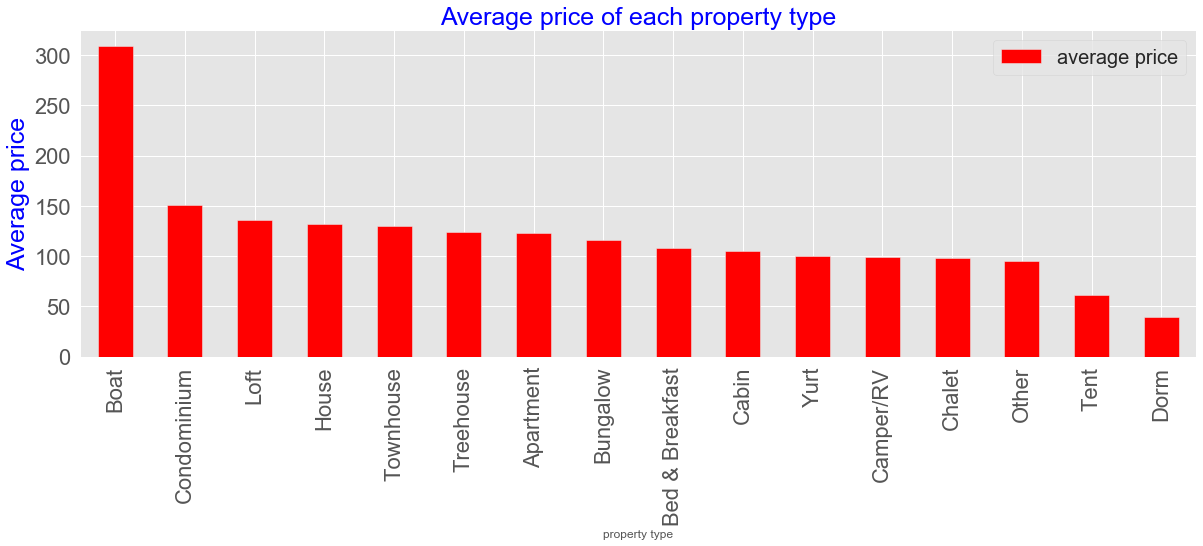

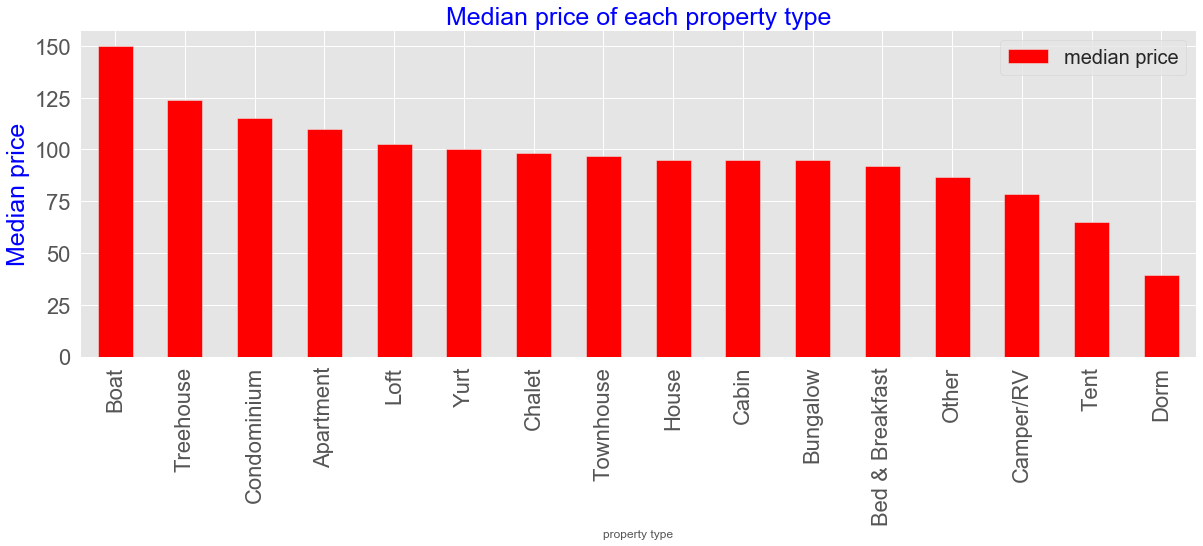

In [47]:
df=listings
title1 = 'Average price of each property type'
title2 = 'Median price of each property type'

plot_average_price('property_type','property type',df,30,title1,'red','blue')
plot_median_price('property_type','property type',df,30,title2,'red','blue')

In [48]:
def plot_neighboorhood(df,title,nthreshhold):
    print("Number of neighboorhoods in New York:", df.neighbourhood_cleansed.nunique(),'\n')
    listings_per_nbhood = df['neighbourhood_cleansed'].value_counts()

    acceptable_nbhood = listings_per_nbhood[listings_per_nbhood >=nthreshhold].index
    acceptable_listings = df[df['neighbourhood_cleansed'].isin(acceptable_nbhood)]
    listings_per_nbhood = acceptable_listings['neighbourhood_cleansed'].value_counts()
    #print("Number of neighboorhoods in New York with at least {} listings: {}".format(
    #nthreshhold,acceptable_listings['neighbourhood_cleansed'].nunique()))
    #print(acceptable_listings.shape)
    
    listings_per_nbhood.to_frame()
    listings_per_nbhood.columns = ['neighborhood','count']
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    listings_per_nbhood.plot(x="neighborhood", y='count', kind="bar")
    #plt.xlabel('neighborhood',fontsize=25)
    plt.ylabel('Number of listings',fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=12)
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=22)
    plt.show()

Number of neighboorhoods in New York: 87 



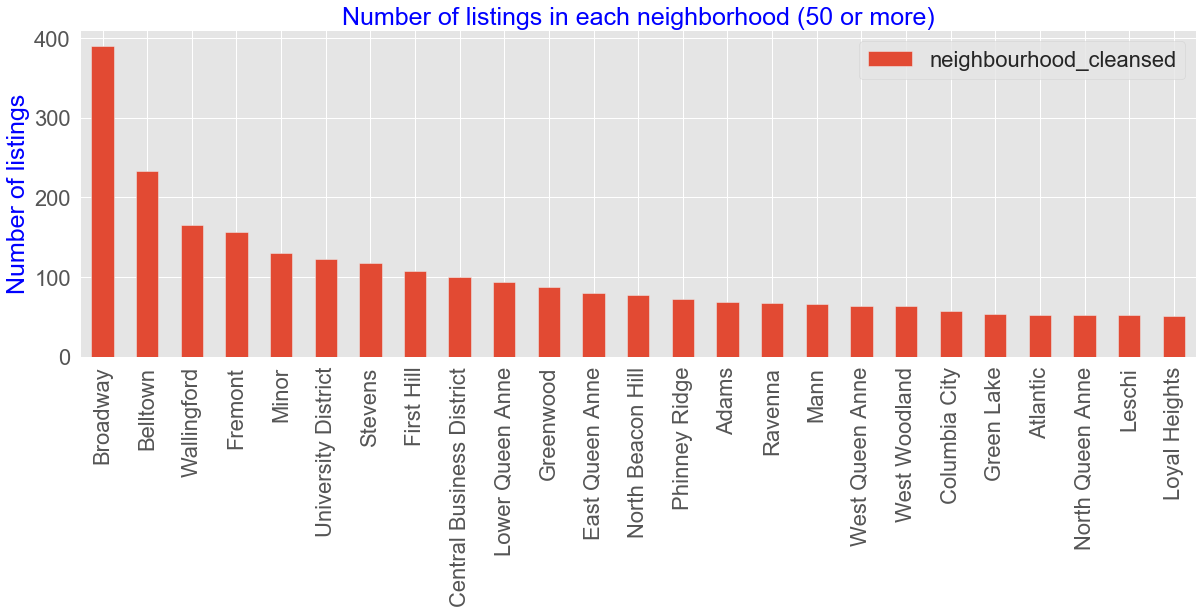

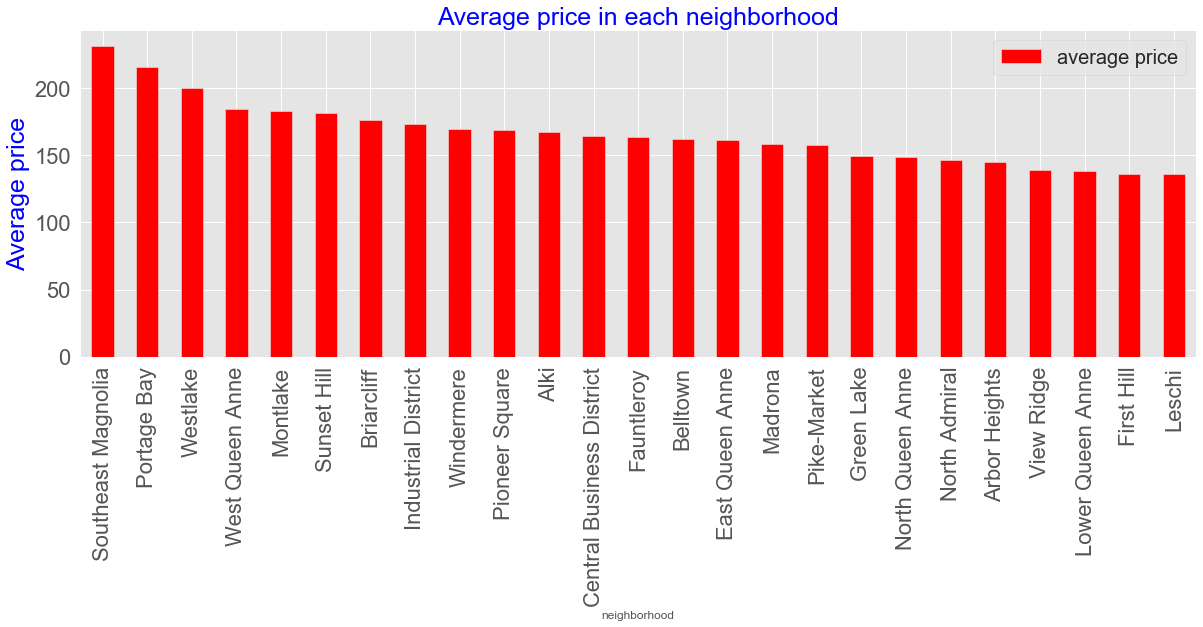

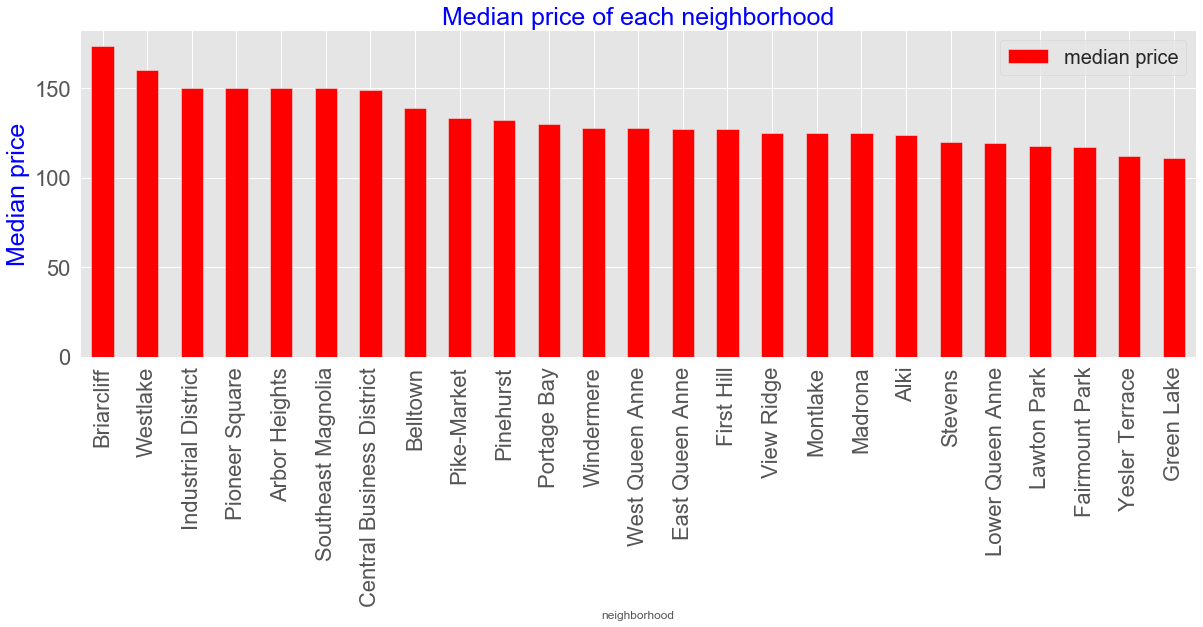

In [49]:
df = listings
nthreshhold=50
nshow=25

title1 = 'Number of listings in each neighborhood (50 or more)'
title2 = 'Average price in each neighborhood'
title3 = 'Median price of each neighborhood'

plot_neighboorhood(df,title1,nthreshhold)
plot_average_price('neighbourhood_cleansed','neighborhood',df,nshow,title2,'red','blue')
plot_median_price('neighbourhood_cleansed','neighborhood',df,nshow,title3,'red','blue')

In [50]:
def plot_price_wrt_room_type(df,title):
    df2 = df.pivot(columns='room_type',values='price')
    x1=list(df2[df2.columns[0]])
    x2=list(df2[df2.columns[1]])
    x3=list(df2[df2.columns[2]])

    plt.rc('legend',**{'fontsize':25})
    #plt.legend(fontsize=20)
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=25)
    plt.ylabel("Count",fontsize=25,color='blue')
    plt.xlabel("Price",fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.legend(prop={'size': 10}) 
    plt.tick_params(labelsize=25)
    n_bins=12
    colors = ['yellow', 'red', 'green']
    labels=[df2.columns[0],df2.columns[1],df2.columns[2]]
    plt.hist([x1, x2, x3], n_bins, histtype='bar', 
             color=colors, range=[0,400],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

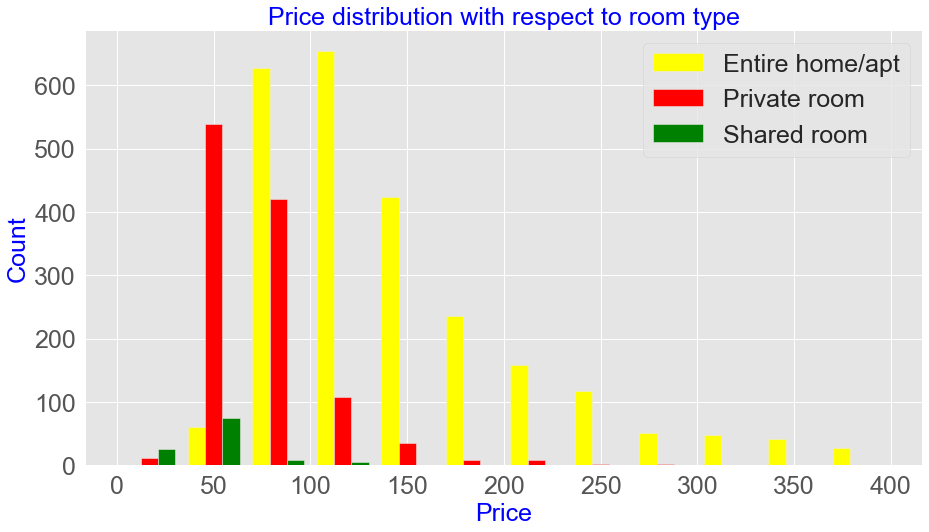

In [51]:
df=listings
title='Price distribution with respect to room type'
plot_price_wrt_room_type(df,title)

In [52]:
def plot_price_wrt_number_of_beds(df,title):
    df2 = df.pivot(columns='beds',values='price')
    x=[list(df2[df2.columns[i]]) for i in range(len(df2.columns)) if i <= 10]
    labels=[str(int(df2.columns[i]))+' beds' for i in range(len(df2.columns))]

    plt.rc('legend',**{'fontsize':20})
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=14)
    plt.ylabel("Count",fontsize=25,color='blue')
    plt.xlabel("Price",fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.legend(prop={'size': 10}) 
    plt.tick_params(labelsize=25)
    n_bins=12
    plt.hist(x, n_bins, stacked=True,range=[0,600],label=labels)        
    plt.legend(loc="upper right")
    plt.show()
    

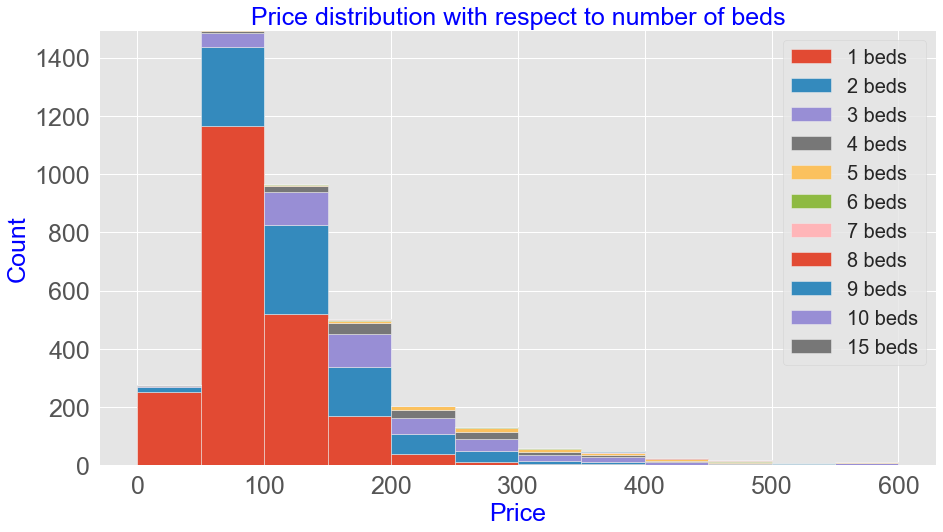

In [53]:
df=listings
title='Price distribution with respect to number of beds'
plot_price_wrt_number_of_beds(df,title)

# finding out how many unique features are there

In [54]:
def get_amenities(df,message1,message2):
    all_amenities=df['amenities'].tolist()
    #all_amenities=','.join(all_amenities).split(',')
    all_amenities=','.join(map(str, all_amenities)).split(',')
    #all_amenities=list(all_amenities)
    #x='\'\''
    #if x in all_amenities: print('Yes')
    unique_amenities=set(all_amenities)
    unique_amenities=list(unique_amenities)
    print()
    print(message1.format(len(unique_amenities)),'\n')
    print(message2.format(sorted(unique_amenities)))
    
    return (all_amenities,unique_amenities)

In [55]:
df = listings
message1='Number of unique amenities is {}'
message2='List of amenities={}'
all_amenities_listing,unique_amenities_listing = get_amenities(df,message1,message2)


Number of unique amenities is 40 

List of amenities=['24-Hour Check-in', 'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building', 'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer', 'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer', 'Wheelchair Accessible', 'Wireless Internet']


In [56]:
df = train
message1='Training set: number of unique amenities is {}'
message2='Training set: list of amenities={}'
all_amenities_train,unique_amenities_train = get_amenities(df,message1,message2)


Training set: number of unique amenities is 39 

Training set: list of amenities=['24-Hour Check-in', 'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building', 'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer', 'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV', 'Washer', 'Wheelchair Accessible', 'Wireless Internet']


In [57]:
df = test
message1='Test set: number of unique amenities is {}'
message2='Test set: list of amenities={}'
all_amenities_test,unique_amenities_test = get_amenities(df,message1,message2)


Test set: number of unique amenities is 40 

Test set: list of amenities=['24-Hour Check-in', 'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building', 'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer', 'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer', 'Wheelchair Accessible', 'Wireless Internet']


In [58]:
def amenities_frequency_plot(amenities,title,plot):
    
    fdist = FreqDist(amenities)
    d = pd.DataFrame({'Amenity': list(fdist.keys()),'Count': list(fdist.values())})
    #print(d.shape) 
    d2=d.copy()
    d2 = d2.nlargest(columns="Count", n = 25)

    if plot==True:
        plt.style.use('ggplot')
        plt.rcParams['figure.figsize']=(20,6)
        plt.style.use(style='ggplot')
        d2.plot(x='Amenity',y='Count',kind='bar',color='red')
        plt.ylabel('Frequency',fontsize=25,color='blue')
        #plt.xlabel('Amenity',fontsize=25,color='blue')
        plt.title(title,fontsize=25,color='blue')
        #plt.xlabel('Amenity',fontsize=12)
        plt.tick_params(labelsize=20)
        plt.xticks(rotation='vertical')
        plt.show()
    
    return d

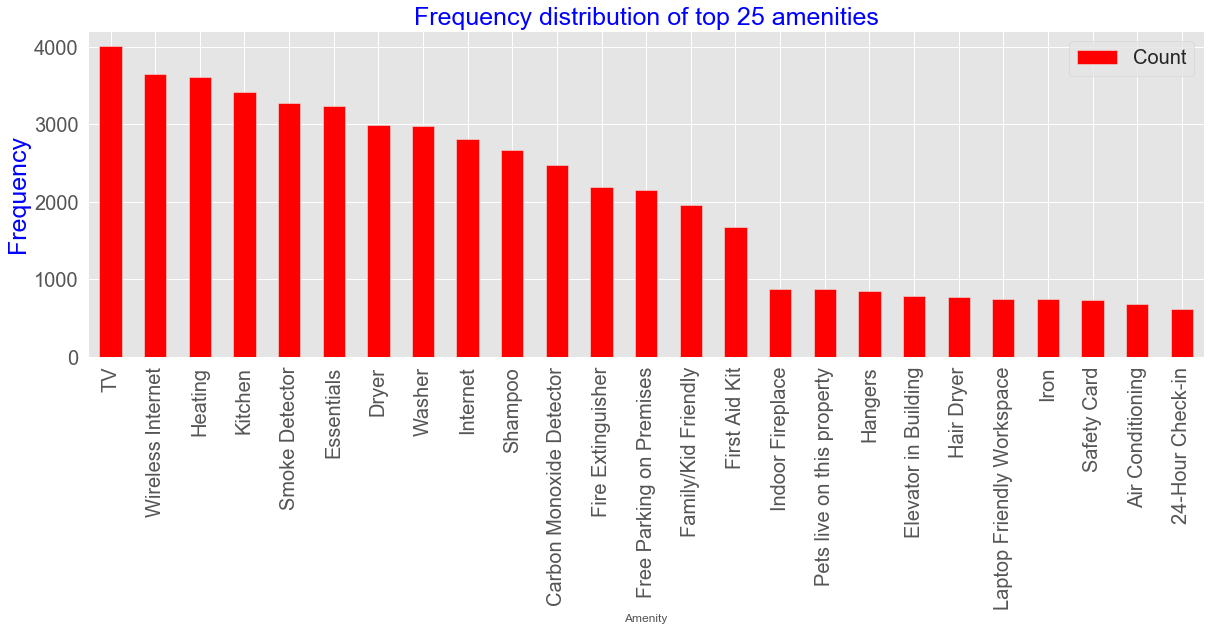

In [61]:
amenities=all_amenities_listing
title='Frequency distribution of top 25 amenities'
amenities_freq_dist_train=amenities_frequency_plot(amenities,title,True)

In [62]:
amenities=all_amenities_train
title='Training set: Frequency distribution of top 25 amenities'
amenities_freq_dist_train=amenities_frequency_plot(amenities,title,False)

In [63]:
amenities=all_amenities_test
title='Test set: Frequency distribution of top 25 amenities'
amenities_freq_dist_test=amenities_frequency_plot(amenities,title,False)

In [64]:
def plot_avg_median_price_amenity(df,unique_amenities,title,measure,ylabel):
    if measure=='mean':
        amenity_prices = [
            (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].mean()) 
            for amn in unique_amenities
        ]
    elif measure=='median': 
        amenity_prices = [
            (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].median()) 
            for amn in unique_amenities
        ]
    else:
        return 'measure not found'
        

    amenity_vs_price = pd.Series(data=[a[1] for a in amenity_prices], 
                                 index=[a[0] for a in amenity_prices])
    amenity_vs_price = amenity_vs_price.to_frame().reset_index()
    
    amenity_vs_price = amenity_vs_price.rename(
        columns= {0: ylabel,'index': 'amenity'})

    d2 = amenity_vs_price.nlargest(columns=ylabel, n = 25)
    d2.head()

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    #plt.bar(d['amenity'],d['average price'],color='blue')
    d2.plot(x='amenity',y=ylabel,kind='bar',color='red')
    plt.ylabel(ylabel,fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=12)
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')

    plt.show()

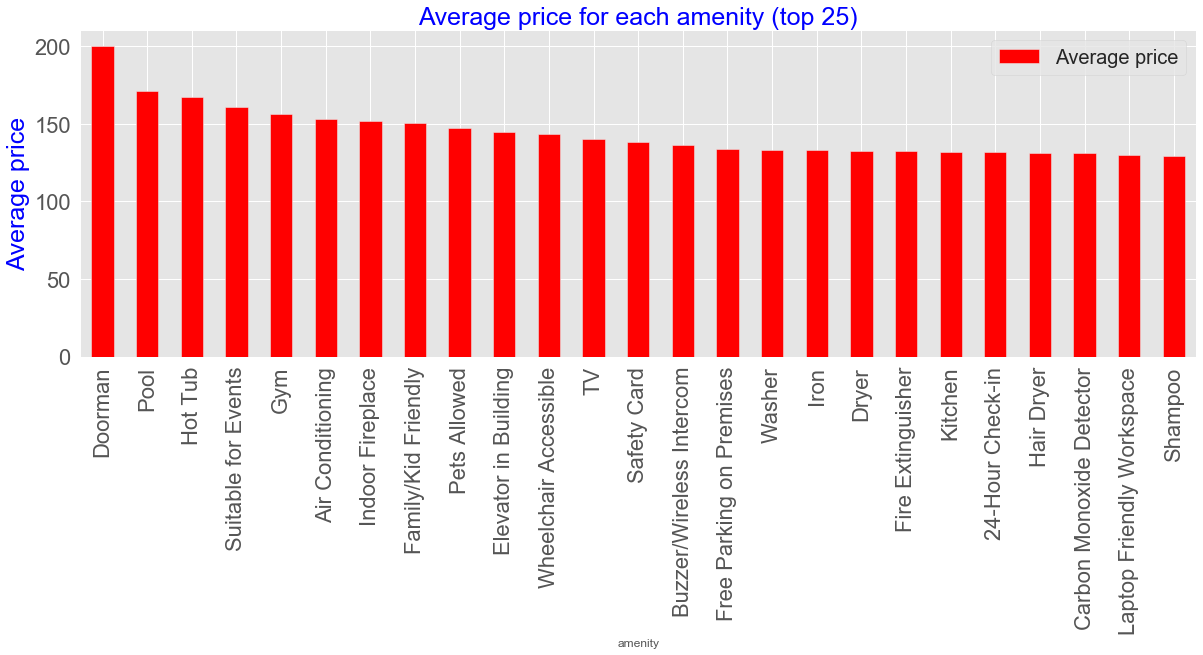

In [66]:
df =listings
unique_amenities = unique_amenities_listing

title='Average price for each amenity (top 25)'
measure='mean'
ylabel='Average price'
plot_avg_median_price_amenity(df,unique_amenities,title,measure,ylabel)

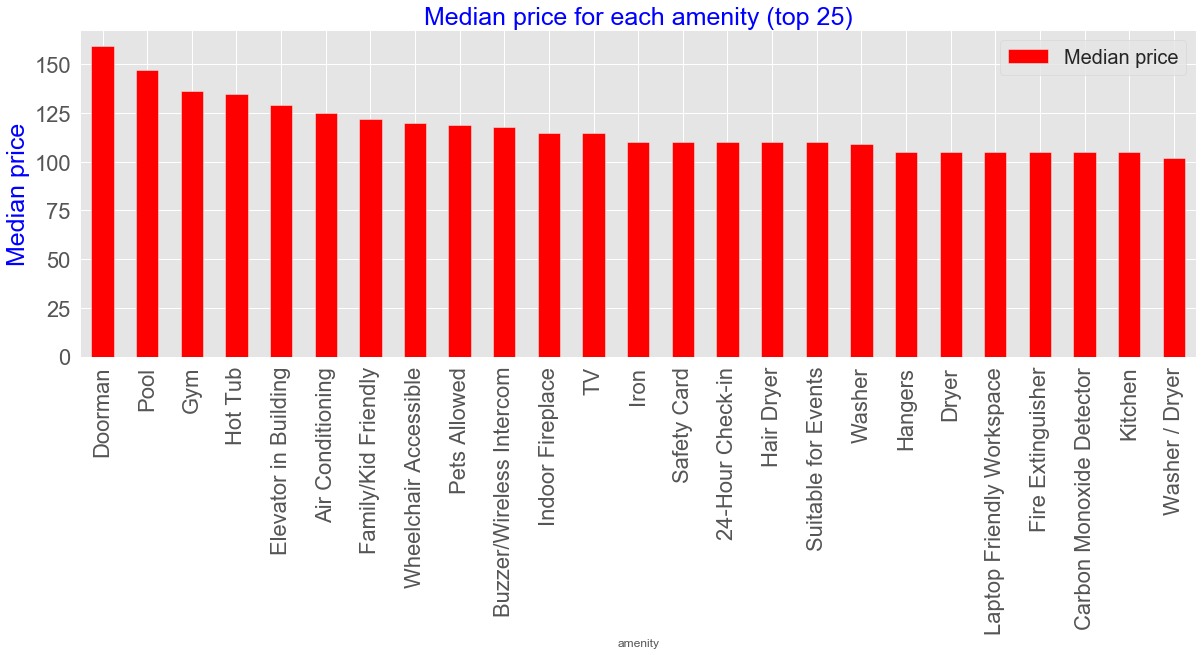

In [68]:
df =listings
unique_amenities = unique_amenities_listing

title='Median price for each amenity (top 25)'
measure='median'
ylabel='Median price'
plot_avg_median_price_amenity(df,unique_amenities,title,measure,ylabel)

# Convert categorical column amenities to numberical values

In [69]:
def apply_weights_to_listings(x,w):
    x = list(x.split(','))
    s=sum([w['Count'][w['Amenity'][w['Amenity']==i].index.tolist()[0]] for i in x])
    return s

def engineer_amenities(df,amenities_freq_dist):
    w = amenities_freq_dist.copy()
    w['Count'] = w['Count']/w['Count'].max()
    df['amenities']=df['amenities'].apply(apply_weights_to_listings,args=[w])
    return df

In [70]:
train_backup = train.copy()
train = engineer_amenities(train,amenities_freq_dist_train)

In [71]:
train.shape
train['amenities'].head()

0     7.931391
1    11.229950
2    12.454887
3     5.828321
4     8.512845
Name: amenities, dtype: float64

In [72]:
test_backup = test.copy()
test = engineer_amenities(test,amenities_freq_dist_test)
test.shape
test['amenities'].head()

0    12.078721
1     9.649446
2    12.339483
3     7.040590
4    10.425584
Name: amenities, dtype: float64

In [73]:
def encode(df):
    categorical_features = list(df.columns[df.dtypes == 'object'])
    for i in  categorical_features:
        df[i] = LabelEncoder().fit_transform(df[i])
    return df


In [74]:
train.dtypes

host_id                               int64
host_is_superhost                    object
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
neighbourhood_group_cleansed         object
state                                object
zipcode                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                           float64
price                           

In [75]:
train.head()

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,7354306,f,18.0,18.0,"['email', 'phone', 'reviews']",t,f,Stevens,Capitol Hill,WA,...,45,72,347,2016-01-04,20,f,strict,f,f,18
1,3737272,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Maple Leaf,Northgate,WA,...,27,48,323,2016-01-04,43,f,strict,f,t,1
2,20321164,t,3.0,3.0,"['email', 'phone', 'facebook', 'google', 'link...",t,t,Greenwood,Other neighborhoods,WA,...,0,0,242,2016-01-04,16,f,flexible,f,f,3
3,25417834,t,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,WA,...,52,82,171,2016-01-04,45,t,moderate,f,f,1
4,19962298,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,First Hill,Downtown,WA,...,46,66,287,2016-01-04,71,t,moderate,f,f,1


In [76]:
train = encode(train)
train.head()

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,7354306,0,18.0,18.0,83,1,0,74,2,0,...,45,72,347,0,20,0,2,0,0,18
1,3737272,0,1.0,1.0,34,1,1,43,10,0,...,27,48,323,0,43,0,2,0,1,1
2,20321164,1,3.0,3.0,11,1,1,26,11,0,...,0,0,242,0,16,0,0,0,0,3
3,25417834,1,1.0,1.0,76,1,1,81,12,0,...,52,82,171,0,45,1,1,0,0,1
4,19962298,0,1.0,1.0,76,1,1,20,6,0,...,46,66,287,0,71,1,1,0,0,1


In [77]:
test.dtypes

host_id                               int64
host_is_superhost                    object
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
neighbourhood_group_cleansed         object
state                                object
zipcode                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                           float64
price                           

In [78]:
test = encode(test)
test.head()

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,22372266,0,1.0,1.0,27,1,1,75,12,0,...,40,65,327,0,18,1,2,0,0,1
1,2983711,0,1.0,1.0,65,1,0,75,12,0,...,60,69,69,0,1,0,2,0,0,1
2,6170760,0,1.0,1.0,26,1,1,75,12,0,...,0,0,125,0,0,0,0,0,0,1
3,14100483,0,1.0,1.0,58,1,1,75,12,0,...,55,85,360,0,1,0,0,0,0,1
4,16708587,0,2.0,2.0,38,1,1,75,12,0,...,3,33,293,0,8,0,2,0,0,2


In [79]:
test.dtypes

host_id                               int64
host_is_superhost                     int32
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                    int32
host_has_profile_pic                  int32
host_identity_verified                int32
neighbourhood_cleansed                int32
neighbourhood_group_cleansed          int32
state                                 int32
zipcode                               int32
latitude                            float64
longitude                           float64
is_location_exact                     int32
property_type                         int32
room_type                             int32
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                              int32
amenities                           float64
price                           

# Checking the correlation with price

In [80]:
corrmat = listings.corr()
print (corrmat['price'].sort_values(ascending=False)[:15], '\n')
print (corrmat['price'].sort_values(ascending=False)[-10:])

price                        1.000000
accommodates                 0.658237
bedrooms                     0.633625
beds                         0.595246
cleaning_fee                 0.592969
bathrooms                    0.526198
guests_included              0.399988
security_deposit             0.340482
extra_people                 0.132007
host_listings_count          0.095741
host_total_listings_count    0.095741
minimum_nights               0.018087
maximum_nights              -0.004103
latitude                    -0.011437
availability_365            -0.016584
Name: price, dtype: float64 

maximum_nights                   -0.004103
latitude                         -0.011437
availability_365                 -0.016584
availability_30                  -0.041605
host_id                          -0.045403
availability_60                  -0.053941
calculated_host_listings_count   -0.054175
availability_90                  -0.063652
longitude                        -0.104497
number_of_rev

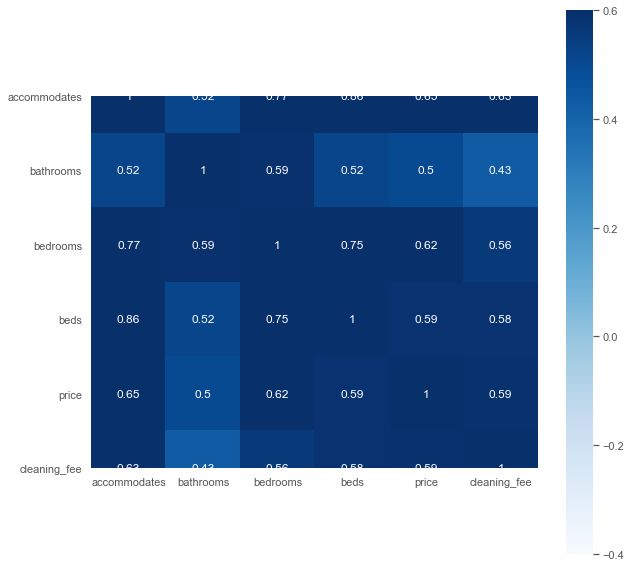

In [86]:
top_corr_features = corrmat.index[abs(corrmat["price"])>0.4]
plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr_features].corr(), annot = True, cmap = "Blues", 
                cbar = True, vmin = -0.4, vmax = 0.6, square=True, annot_kws={"size": 12})
#sns.heatmap(corrmat,annot= True)

In [87]:
#Back up copy
X_train=train.copy()
X_test=test.copy()

y_train = np.log1p(X_train['price'])
y_test  = np.log1p(X_test['price'])

#drop_features=['price',jurisdiction_names','license','square_feet','has_availability']
drop_features=['price']
X_train.drop(drop_features,axis=1,inplace = True)
X_test.drop(drop_features,axis=1,inplace = True)

In [88]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3007, 40), (3007,), (750, 40), (750,))

In [89]:
def evaluate(model, X, y, title):
    predictions = model.predict(X)
    errors = abs(np.expm1(predictions) - np.expm1(y))
    mape = 100 * np.mean(errors / np.expm1(y))
    accuracy = 100 - mape
    score_gbr = model.score(X,y)
    #rsquared = r2_score(y,predictions)
    rmse_gbr = np.sqrt(mean_squared_error(np.expm1(y),np.expm1(predictions)))
    
    print(title)
    print('R^2: {:0.4f}'.format(score_gbr))
    #print('R^2: {:0.4f}'.format(rsquared))
    print('RMSE: ${:0.4f} '.format(rmse_gbr))
    print('Average Error: ${:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.3f}%.'.format(accuracy),'\n')
    
    return predictions

    
def scatter_plot(prediction,y,title):
    plt.rcParams['figure.figsize']=(10,4)
    plt.style.use(style='ggplot')
    plt.scatter(x=prediction, y=y, alpha=.75)
    plt.ylabel('log(input price)',fontsize=16)
    plt.xlabel('log(predicted price)',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.title(title,fontsize=16)
    plt.show()    
    
def feature_extraction(importances,title):
    plt.rcParams['figure.figsize']=(12,6)
    importances[0:15].iloc[::-1].plot(kind='barh',legend=False,fontsize=16)
    #importances.plot(kind='barh',legend=False,fontsize=16)
    plt.tick_params(labelsize=18)
    plt.ylabel("Feature",fontsize=20)
    plt.xlabel("Importance viariable",fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()
    
def scatter_plot2(prediction1,y1,prediction2,y2,title):
    a=min(min(prediction1),min(y1),min(prediction2),min(y2))-0.2
    b=max(max(prediction1),max(y1),max(prediction2),max(y2))+0.2
    plt.rcParams['figure.figsize']=(10,4)
    plt.style.use(style='ggplot')
    plt.scatter(x=prediction1, y=prediction1-y1, color='red',label='Training data',alpha=.75)
    plt.scatter(x=prediction2, y=prediction2-y2, color='blue', marker='s', label='Test data',alpha=.75)
    plt.hlines(y = 0, xmin = a, xmax = b, color = "black")
    plt.ylabel('log(input price)',fontsize=16)
    plt.xlabel('log(predicted price)',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.title(title,fontsize=16)
    plt.legend(fontsize=16)
    plt.show()    


def scatter_plot3(prediction1,y1,prediction2,y2,title):
    a=min(min(prediction1),min(y1),min(prediction2),min(y2))-0.2
    b=max(max(prediction1),max(y1),max(prediction2),max(y2))+0.2
    plt.rcParams['figure.figsize']=(10,4)
    plt.style.use(style='ggplot')
    plt.scatter(x=prediction1, y=y1, color='red',label='Training data',alpha=.75)
    plt.scatter(x=prediction2, y=y2, color='blue', marker='s', label='Test data',alpha=.75)
    plt.plot([a, b], [a, b], c = "black")
    plt.ylabel('log(input price)',fontsize=16)
    plt.xlabel('log(predicted price)',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.title(title,fontsize=16)
    plt.legend(fontsize=16)
    plt.show()    

# fitting the model and displaying it

In [90]:
gbr = GradientBoostingRegressor(min_samples_split=400,
                                min_samples_leaf=50,
                                subsample=0.8,
                                random_state=1,
                               learning_rate=0.01,
                               max_features='sqrt')
#param_grid = {"n_estimators":np.arange(1000,10000,1000),'learning_rate':[0.01,0.05,0.1,0.25,0.5]}
param_grid = dict(n_estimators=[6000,7000], max_depth=[8,12,16])

grid_gbr=GridSearchCV(gbr, param_grid, cv=10, scoring='neg_mean_squared_error',n_jobs=-2)

grid_gbr.fit(X_train,y_train)

#print("Random forest grid.cv_results_ {}".format(grid_gbr.cv_results_))
print("Random forest grid.best_score_ {}".format(grid_gbr.best_score_))
print("Random forest grid.best_params_ {}".format(grid_gbr.best_params_))
print("Random forest grid.best_estimator_ {}".format(grid_gbr.best_estimator_))

model_gbr = grid_gbr.best_estimator_

Random forest grid.best_score_ -0.08037159421962702
Random forest grid.best_params_ {'max_depth': 8, 'n_estimators': 6000}
Random forest grid.best_estimator_ GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=400,
                          min_weight_fraction_leaf=0.0, n_estimators=6000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=0.8, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)


Gradient Boosting Regression: training set model performance
R^2: 0.9074
RMSE: $32.9327 
Average Error: $17.2162
Accuracy = 87.243%. 

Gradient Boosting Regression: test set model performance
R^2: 0.7713
RMSE: $49.8875 
Average Error: $29.9698
Accuracy = 77.288%. 



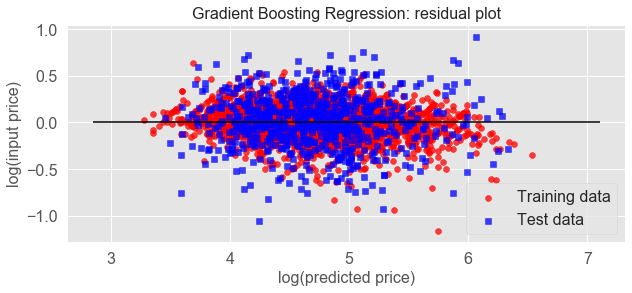

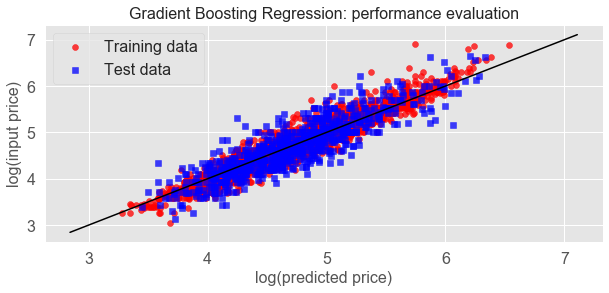

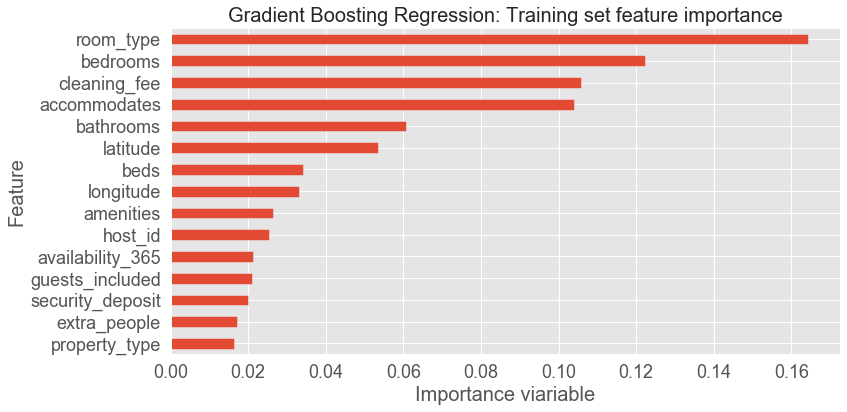

In [91]:
title0='Gradient Boosting Regression:'
model_tmp = model_gbr

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

importances_train = pd.DataFrame({'Feature':X_train.columns, 'Importance':model_tmp.feature_importances_})
importances_train = importances_train.sort_values('Importance',ascending=False).set_index('Feature')
feature_extraction(importances_train,'Gradient Boosting Regression: Training set feature importance')

# finding out the top revenue in seattle 

                           estimated_revenue
neighbourhood_cleansed                      
Broadway                          640.769231
Southeast Magnolia                548.294118
Central Business District         488.240000
Pike-Market                       482.285714
Harrison/Denny-Blaine             466.714286
...                                      ...
South Park                        125.000000
Rainier Beach                     117.833333
Olympic Hills                     115.066667
North Delridge                    114.156250
South Beacon Hill                  92.750000

[87 rows x 1 columns]


C:\Users\glenn\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\glenn\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


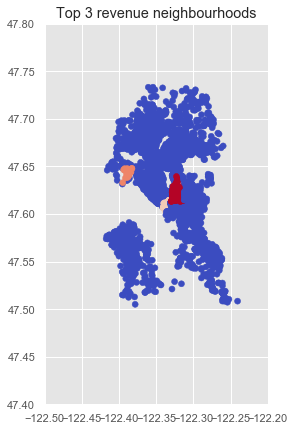

In [47]:
listings['estimated_revenue'] = listings['price'] * listings['minimum_nights']

pd_neighbourhood_revenue = listings[['neighbourhood_cleansed','estimated_revenue']].groupby(['neighbourhood_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(pd_neighbourhood_revenue)

pd_listings_plot = listings[['neighbourhood_cleansed','longitude','latitude','estimated_revenue']]
pd_listings_plot.loc[:,'color'] = 0

color_value = 1
for neighbourhood in pd_neighbourhood_revenue[0:3].index:
  pd_listings_plot.at[pd_listings_plot['neighbourhood_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2

# plot
plt.figure(figsize=(4, 7))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")

ax.set_autoscaley_on(False)
ax.set_ylim([47.4, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.5, -122.2])
plt.scatter(pd_listings_plot['longitude'],
            pd_listings_plot['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot['color']
           )

_ = plt.plot()